In [84]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from random import randrange
import scipy

# import some data to play with
iris = datasets.load_iris()
X = iris.data  
y = iris.target
X = X/np.mean(X)
#print(np.shape(X))
#print(np.shape(y))

(150, 4)
(150,)


In [85]:
"""
LMS function used to update weights
"""
def LMS (error, inp, weight, learning_rate = 0.5):
    print(np.shape(inp), np.shape(weight))
    return weight + (2 * learning_rate * (inp * error))
def getLoss(w,x,Y,lam):
    m = x.shape[0] #First we get the number of training examples
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    y_mat = oneHotIt(y)
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    return loss
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [91]:
w = np.zeros([X.shape[1],len(np.unique(y))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
train = int(np.shape(X)[0] * 0.8)
for i in range(0,int(np.shape(X)[0] * 0.8)):
    loss = getLoss(w,X,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(losses)

[1.0986122886681098, 1.0986120589662243, 1.0986118292651175, 1.0986115995647898, 1.0986113698652404, 1.0986111401664698, 1.098610910468478, 1.098610680771265, 1.0986104510748307, 1.0986102213791753, 1.0986099916842982, 1.0986097619902002, 1.098609532296881, 1.0986093026043402, 1.0986090729125781, 1.0986088432215948, 1.0986086135313906, 1.0986083838419647, 1.0986081541533177, 1.0986079244654494, 1.0986076947783601, 1.0986074650920494, 1.0986072354065173, 1.0986070057217638, 1.0986067760377893, 1.0986065463545935, 1.0986063166721762, 1.0986060869905379, 1.0986058573096782, 1.0986056276295972, 1.0986053979502952, 1.0986051682717717, 1.0986049385940271, 1.0986047089170607, 1.0986044792408733, 1.0986042495654651, 1.0986040198908353, 1.0986037902169841, 1.0986035605439117, 1.0986033308716183, 1.0986031012001034, 1.0986028715293674, 1.0986026418594097, 1.0986024121902311, 1.0986021825218311, 1.0986019528542101, 1.0986017231873677, 1.0986014935213038, 1.0986012638560188, 1.0986010341915127, 1.

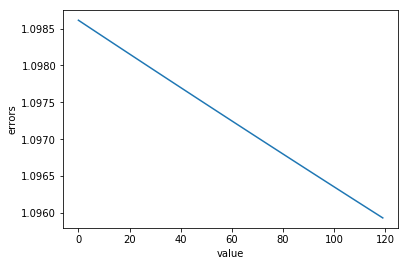

In [87]:
plt.plot(losses)
plt.ylabel('errors')
plt.xlabel('value')
plt.show()

In [88]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [89]:
print('Training Accuracy: ', getAccuracy(X,y))
print('Test Accuracy: ', getAccuracy(X[train:], y[train:]))

Training Accuracy:  0.666666666667
Test Accuracy:  1.0


In [103]:
out = (np.matmul(X[1],w))
out = np.exp(out) / np.sum(np.exp(out), axis=0)
print("Validation for example 2 : predicted - ",np.argmax(out),"actual - " ,y[1])


Validation for example 2 : predicted -  0 actual -  0
